In [1]:
import pandas as pd
import numpy as np
from math import sin, cos, tan, pi, sqrt
import scipy as sp
import matplotlib.pyplot as plt

stopped bouncing at t=7.762



Text(0.5, 1.0, 'bouncing ball')

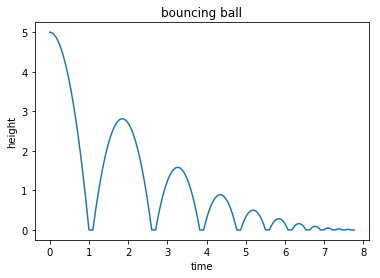

In [4]:

h0 = 5         # m
v = 0          # m/s, current velocity
g = 10         # m/s/s
t = 0          # starting time
dt = 0.001     # time step
rho = 0.75     # coefficient of restitution
tau = 0.10     # contact time for bounce
hmax = h0      # keep track of the maximum height
h = h0
hstop = 0.01   # stop when bounce is less than 1 cm
freefall = True # state: freefall or in contact

t_last = -sqrt(2*h0/g) # time we would have launched to get to h0 at t=0
vmax = sqrt(2 * hmax * g) #velocity maximum for freefall ball [FREEFALL]
H = []
T = []

while(hmax > hstop):
  if(freefall):
    hnew = h + v*dt - 0.5*g*dt*dt #H after bounce 
    if(hnew<0):
      t = t_last + 2*sqrt(2*hmax/g) # t every bounce [PARABOLA {freefall} ]
      freefall = False
      t_last = t + tau
      h = 0
    else:
      t = t + dt
      v = v - g*dt #V every time step [ GLBB ]
      h = hnew
  else:
    t = t + tau
    vmax = vmax * rho
    v = vmax
    freefall = True
    h = 0
  hmax = 0.5*vmax*vmax/g #hmax every time step [ PARABOLA ] tetha = 90
  H.append(h)
  T.append(t)

print("stopped bouncing at t=%.3f\n"%(t))

plt.figure()
plt.plot(T, H)
plt.xlabel('time')
plt.ylabel('height')
plt.title('bouncing ball')
